In [1]:
!pip install transformers datasets accelerate -q
!pip install librosa -q

In [9]:
import sklearn
import json, os, time, glob

import numpy as np
import librosa
from collections import defaultdict
from pprint import pprint


import sklearn.metrics as skm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import torch

import torch

In [10]:
data_path = './48k'
glob.glob(data_path+'/*')

['./48k/training.npz', './48k/meta.json']

In [11]:
arrays = np.load(f'{data_path}/training.npz')
meta = json.load(open(f'{data_path}/meta.json', 'r'))

pprint(meta)

{'comment': 'no shift',
 'labelfile': 'project-6-at-2024-11-23-15-47-9e286610.json',
 'labels': {'Boring': 1,
            'Celebration': 3,
            'Chanting/Singing': 2,
            'Disappointment': 0,
            'Excitement': 4},
 'sample_rate': 48000,
 'snippet_sec': 1,
 'sources': ['HKvsBHUTAN001.wav',
             'HKvsBHUTAN002.wav',
             'HKvsBRUNEI.wav',
             '2023716VS.wav',
             '1ExcitementDisappointment.MP3.wav',
             '2ExcitementCelebration.MP3.wav',
             '3Boring.MP3.wav',
             'Boring_001.wav',
             'Celebration_001.MP3.wav',
             'Celebration_002.MP3.wav',
             'Combine.MP3.wav',
             'Disappointment_001.wav',
             'Disappointment_002.wav',
             'Excitement_001.MP3.wav',
             'HongKongvsSingaporeInternationalFriendlyMongkokStadium.wav',
             'test.MP3.wav']}


In [12]:
id2label = {v:k for k,v in meta['labels'].items()}
id2label

{0: 'Disappointment',
 1: 'Boring',
 2: 'Chanting/Singing',
 3: 'Celebration',
 4: 'Excitement'}

KeyError: np.int64(1)

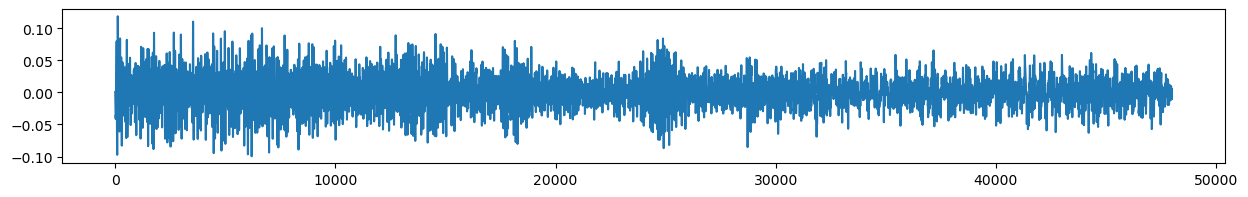

In [15]:
ix = 7
fig, ax =  plt.subplots(1,1, figsize=(15,2))

ax.plot(arrays['X'][ix])
ax.set_title(meta['labels'][arrays['y'][ix]])

In [ ]:
ix = 50

S = librosa.feature.melspectrogram(
    y=arrays['X'][ix],
    sr=16000,
    power=1
)

librosa.display.specshow(S, x_axis='time', y_axis='mel')

In [ ]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=10, train_size=.8, random_state=42)
gss.get_n_splits()

if False:
    for i, (train_index, test_index) in enumerate(gss.split(**arrays)):
        print(f"Fold {i}:")
        print(f"  Train: source={set(arrays['groups'][train_index])}")
        print(f"  Test:  source={set(arrays['groups'][test_index])}")